In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn.neural_network import MLPRegressor


# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics
 
import matplotlib.pyplot as plt
import seaborn as sns  
import statsmodels.api as sm

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
# to check the null values 
dataset.isnull().sum()

Number of atoms                                                   0
Relative number of N  atoms                                       0
Relative number of Cl atoms                                       0
Wiener index                                                      0
Kier&Hall index (order 3)                                         0
Average Information content (order 0)                             0
Balaban index                                                     0
Max partial charge for a N  atom [Zefirov's PC]                   0
Min partial charge for a N  atom [Zefirov's PC]                   0
Polarity parameter / square distance                              0
PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]                 0
PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]                 0
RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]    0
LUMO energy                                                       0
LUMO+1 energy                                   

In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [9]:
x_train.shape

(844, 29)

In [10]:
x_test.shape

(212, 29)

In [11]:
# scealing is required for indepandent variables at ANN
from sklearn.preprocessing import StandardScaler

In [12]:
scale = StandardScaler()

In [13]:
X = scale.fit_transform(x)
X_train = scale.fit_transform(x_train)
X_test = scale.fit_transform(x_test)

In [14]:

  #regressor = svm.SVR()
  #regressor = LinearRegression()
  #regressor = SGDRegressor(max_iter=5000, tol=1e-3)
  #regressor = KNeighborsRegressor(n_neighbors=5)
  regressor = MLPRegressor(learning_rate = "constant", activation = "relu",
          solver ="adam",hidden_layer_sizes=190, random_state=1, max_iter=100000)
  #regressor = AdaBoostRegressor(random_state=0, n_estimators=100)
  #regressor = GradientBoostingRegressor(random_state=0)
  #regressor = tree.DecisionTreeRegressor()
  #regressor = linear_model.Ridge(alpha=.5)
  #regressor = linear_model.Lasso(alpha=0.1)
  #regressor = ElasticNet(random_state=0)
  #regressor = KernelRidge(alpha=1.0)


In [15]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [16]:
regressor.fit (X_train, y_train)

MLPRegressor(hidden_layer_sizes=190, max_iter=100000, random_state=1)

In [17]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:04.391000


In [38]:
# compute the testing accuracy
y_pred = regressor.predict(X_test)

In [39]:
y_pred_train = regressor.predict(X_train)

In [40]:
y_pred_train.shape

(844,)

In [41]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [42]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [43]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.18609281649185522
MSE is 0.05901364143135643
R2 score is 0.7739638897073605


In [44]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [45]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.10922981983080732
MSE is 0.02610123830295875
R2 score is 0.886980652712109


In [46]:
#CV for training set 
cvscorevall = (cross_val_score(regressor,X_train,y_train.ravel(),cv=5).mean())

In [68]:
print("The CV score for training dataset")
print("--------------------------------------")
print (cross_val_score(regressor,X_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscorevall))

The CV score for training dataset
--------------------------------------
[0.52398621 0.46738798 0.6466834  0.4704615  0.54762534]
Q2 is 0.5312288845105722


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

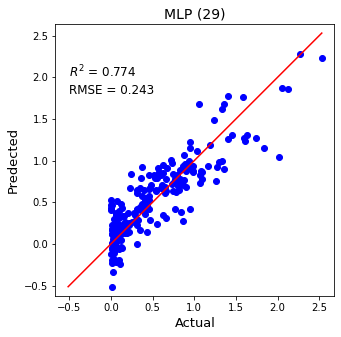

In [64]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')

plt.text(-0.5, 2, '$R^2$ = 0.774', fontsize = 12)
plt.text(-0.5, 1.8, 'RMSE = 0.243', fontsize = 12)
plt.title('MLP (29)', fontsize = 14)
plt.show()


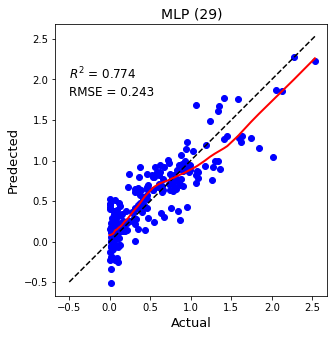

In [65]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('scaled')
plt.text(-0.5, 2, '$R^2$ = 0.774', fontsize = 12)
plt.text(-0.5, 1.8, 'RMSE = 0.243', fontsize = 12)
plt.title('MLP (29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

In [29]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# creatting parameter gride
param_grid_regressor= {'learning_rate': ['constant','adaptive','invscaling'],
                       'activation':['identity', 'logistic', 'tanh', 'relu'], 
    'solver': ['adam', 'sgd', 'lbfgs'], 'hidden_layer_sizes': [50,100, 150, 200]}

In [31]:
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [32]:

regressor_random.fit (X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(hidden_layer_sizes=190,
                                          max_iter=100000, random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [50, 100, 150,
                                                               200],
                                        'learning_rate': ['constant',
                                                          'adaptive',
                                                          'invscaling'],
                                        'solver': ['adam', 'sgd', 'lbfgs']},
                   scoring='neg_mean_squared_error', verbose=2)

In [33]:
regressor_random.best_params_

{'solver': 'adam',
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': 150,
 'activation': 'relu'}

In [34]:
regressor_random.best_score_

-0.11279467973190604

In [35]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [36]:
# creatting parameter gride
param_grid_regressor= {'learning_rate': ['constant','adaptive','invscaling'],
                       'activation':['identity', 'logistic', 'tanh', 'relu'], 
    'solver': ['adam', 'sgd', 'lbfgs'], 'hidden_layer_sizes': [150, 160, 170, 180, 190, 200, 250]}

In [37]:
regressor_grid = GridSearchCV(estimator =regressor, param_grid=param_grid_regressor,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")



In [38]:
regressor_grid.fit (X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=190, max_iter=100000,
                                    random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [150, 160, 170, 180, 190, 200,
                                                250],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring='neg_mean_squared_error', verbose=2)

In [39]:
regressor_grid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 170,
 'learning_rate': 'constant',
 'solver': 'adam'}

In [40]:
regressor_grid.best_score_

-0.10563224231642154

In [27]:
#hyperparameters

In [28]:
learning_rate= ['constant','adaptive','invscaling']
activation= ['identity', 'logistic', 'tanh', 'relu'] 
solver=['adam', 'sgd', 'lbfgs'] 
hidden_layer_sizes= [100, 140, 145, 147, 149, 150, 155, 160, 170, 180, 190, 200]

In [29]:
hyperparameters = dict(learning_rate=learning_rate, activation=activation, solver= solver, 
                       hidden_layer_sizes= hidden_layer_sizes )

In [30]:
clf = GridSearchCV(regressor, hyperparameters, cv=5)

In [ ]:
best_model = clf.fit(X_train,y_train)

In [ ]:
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best activation:', best_model.best_estimator_.get_params()['activation'])
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('hidden_layer_sizes:', best_model.best_estimator_.get_params()['hidden_layer_sizes'])